<h1> Lab Assignment One: Exploring Table Data </h1> 
<br>
<i> Matthew Bartos </i>

<h3> 1. Business Understanding </h3> 

<i>Purpose:</i><br>
The classification dataset being analyzed is "Online Shoppers Purchasing Intention Dataset" from the UCI Machine Learning Repository. This data can be used to identify trends in online shopping and determine if making a sale is likely.  

<i>Dataset Description:</i><br>
The online shopping data was gathered from 12,000+ web sessions, each being unique users, from different time periods throughout the year. These selection categories were used to gain more unbiased data; data not arbitrarily dependent on specific time period, user account, or special day. The dataset contains 10 numerical and 8 categorical attributes, giving more information about the user session. This data was collected so companies could have a better understanding of when and why a user would make an online purchase. 

The data was collected by examining a user’s session information. Using URL information, values regrading type of page and duration a user spent on pages were collected. Google Analytics provides metrics for a user’s activity on the website including “Bounce Rate,” (users leave without visiting another page) “Exit Rate,” (page where users left website) and “Page Value” (page that led to purchase). Since the dataset was collected over the course of a year, the “Special Day” feature indicates how close a purchase date is to a holiday such as Mother’s Day, Valentine’s Day, or Christmas. Finally basic values were determined on the server side including, returning/new customer, browser type, operating system, region, traffic type, and weekend value.

The end goal of analyzing a dataset like this would be determining what are the most important factors leading to a user’s purchases. It is also worth making head to head comparisons between certain categories, like returning versus new customer, to determine if these categories are significant factors in affecting a user’s purchase. If significant trends are identified, third parties could use these analytics to attract users of similar demographics to their website to increase sales. 

<i>Measure of Success: </i><br>
A learning algorithm, when determining if a purchased was made, must have a chance greater than random chance (50%) to have any significance at all. In Bogina's, Kuflik's, and Mokryn's purchasing predictions algorithms, they were able to achieve a success rate of 82.4% and 93.7% precision with two different respective trials/algorithms. Meaning, a machine learning algorithm from this data set needs to have around a 75% success rate to be comparable with Bogina's, Kuflik's, and Mokryn's alorithm.

When comparing between two categories of the dataset, a T-test could be used to see if there is a statistically significant difference between the two groups/categories. 


<i>Sources:</i><br>
Data: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset  <br>
Bogina, Kuflik, and Mokryn : https://essay.utwente.nl/74808/1/seippel_MA_eemcs.pdf (TABLE 2.1) <br>
T-test: https://writing.colostate.edu/guides/page.cfm?pageid=1398&guideid=67 


<h3> 2. Data Understanding </h3>

In [33]:
#panda import statements
import pandas as pd
import numpy as np
#matplot import statements
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 


#read in csv file
df = pd.read_csv('online_shoppers_intention.csv')

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Attributes such as operating systems, browsers, traffic type, and region did not need to be modified because they were already assigned numerical indicators.

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Based on the printed dataframe information, we can see there are no missing inputs from the datatable. (Each feature has a non-null count of 12330). Therefore there is no need to use stastical imuptation to add missing values.

In [35]:
#summary of data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [36]:
import pandas as pd

#data frame
data_des = pd.DataFrame()

data_des['Features'] = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues', 'VisitorType', 'Weekend', 'Special Day', 'Month', 'Revenue']
#browser, region, and traffic type etc. were excluded due to both simplcity and lack of information given by UCI's website
data_des['Description'] = ['Number of administrative pages visited', 'Time spent on administrative pages',
                           'Number of informational pages visited', 'Time spent on informational pages',
                           'Number of product related pages visited', 'Time spent on product related pages',
                           'leave without visiting another page', 'pages where users left website', 
                           'page that led to purchase', 'returning vs new customer', 'weekday or weekend', 'proximity to a holiday/special day', 'Month of the year', 'if sale was made']
data_des['Scales'] = ['Ordinal', 'Interval', 'Ordinal', 'Interval', 'Ordinal', 'Interval', 'Ratio', 'Ratio', 'Norminal', 'Norminal', 'Norminal', 'Interval', 'Norminal' , 'Norminal']
data_des['Discrete/Continous'] = ['Discrete', 'Continuous', 'Discrete', 'Continuous', 'Discrete', 'Continuous', 'Continuous', 'Continuous', 'Discrete', 'Discrete', 'Discrete', 'Continuous', 'Discrete' , 'Discrete']
data_des['Data Type'] = ['int', 'float', 'int', 'float', 'int', 'float', 'float', 'float', 'int' , 'bool', 'bool', 'float', 'int', 'bool']
data_des

,Features,Description,Scales,Discrete/Continous,Data Type
0,Administrative,Number of administrative pages visited,Ordinal,Discrete,int
1,Administrative_Duration,Time spent on administrative pages,Interval,Continuous,float
2,Informational,Number of informational pages visited,Ordinal,Discrete,int
3,Informational_Duration,Time spent on informational pages,Interval,Continuous,float
4,ProductRelated,Number of product related pages visited,Ordinal,Discrete,int
5,ProductRelated_Duration,Time spent on product related pages,Interval,Continuous,float
6,BounceRates,leave without visiting another page,Ratio,Continuous,float
7,ExitRates,pages where users left website,Ratio,Continuous,float
8,PageValues,page that led to purchase,Norminal,Discrete,int
9,VisitorType,returning vs new customer,Norminal,Discrete,bool


In [37]:
#checking for duplicate data
idx = df.duplicated()

# find the number of duplicate (not first show)
len(df[idx])

125

The duplicate data was determined neccessary to be removed. It is impossible to know if an entry is a duplicate because there is no identification attribute/number. However, it is very unlikely for multiple users to have the same browser, region, time spent on a page, and visit on the same time of the year. So it is logical to assume these enteries are duplicate data. On top of this, these duplicates comprise only a small fraction of the data (125/12330). In turn, removing this duplicate data has very little overall affect. 

In [38]:
df.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


When further examining the data, there were a small number of customer types that were not either "returner" or "new" and were labeled as "other." These other customers were to be dropped from the data frame. The data set description gave us no indication or infomation on how to handle this extraneous data or what it means.

In [39]:
#drop the "other customers." Leaves only new and returning customers.
i = 0
for i in df.index:
    if(df['VisitorType'][i] == 'Other'):
        df = df.drop(i)

The data quality has now been verified. There is no missing data from the dataset, meaning no imputation has to take place. All duplicates have been examined and determined to be mistakes, so they were eliminated from the dataset. <br>

<h3> 3. Data Understanding </h3>

<h4> 3.1 Data Exploration </h4>

Categorizing basic features:

In [40]:
perSales = sum(df.Revenue == True) / len(df) * 100
perCustomer = sum(df.VisitorType == 'Returning_Visitor') / len(df) * 100

print('Percentage of customers who made a purchase:' , perSales)
print('Percentage of customers who did not make a purchase:' , (100 - perSales))
print('Percentage of returning customers: ' , perCustomer)
print('Percentage of new customers:' , (100 - perCustomer))

Percentage of customers who made a purchase: 15.451204573295222
Percentage of customers who did not make a purchase: 84.54879542670477
Percentage of returning customers:  86.16578195181707
Percentage of new customers: 13.834218048182933


The majority of customer traffic is returning customers rather than new customers. Majority of site visits do not end in a purchase.

<h4> 3.1.1 Product Related Duration </h4>

<AxesSubplot:xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

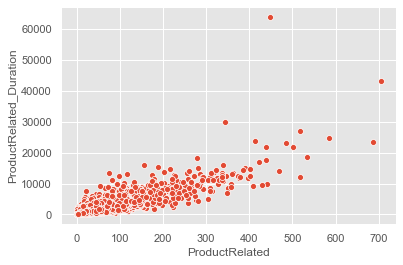

In [46]:
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration", data=df)

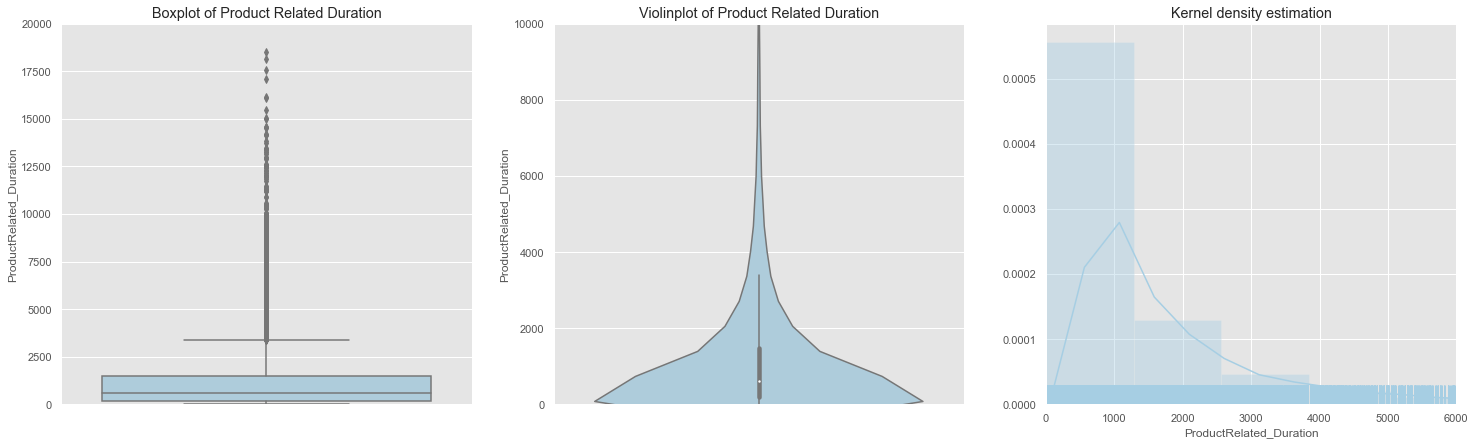

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))  
sns.set_palette("Paired")


plt.subplot(1,3,1)
ax1 = sns.boxplot(y="ProductRelated_Duration", data=df)
#ax1 = sns.boxplot(x ="VisitorType", y="ProductRelated_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Product Related Duration')
plt.ylim(0, 20000) #excluding numbers greater than 6,000; mainly about the actual box plot


plt.subplot(1,3,2)
sns.violinplot(y="ProductRelated_Duration", data=df)
plt.title('Violinplot of Product Related Duration')
plt.ylim(0, 10000)

plt.subplot(1,3,3)
sns.distplot(df.ProductRelated_Duration,  rug=True)
plt.title('Kernel density estimation')
plt.xlim(0,6000)

plt.show()

In [11]:
#describe basic features about the distrubution
df['ProductRelated_Duration'].describe()

count    12245.000000
mean      1199.080153
std       1916.732843
min          0.000000
25%        186.250000
50%        602.583333
75%       1472.000000
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

The product related duration distribution makes sense, as product related duration increases, the number of product related pages visited increases. Product related duration how was on the largest distribution of values, there are a large number of values over 20,000.

<h4> 3.1.2 Informational Related Duration </h4>

<AxesSubplot:xlabel='Informational', ylabel='Informational_Duration'>

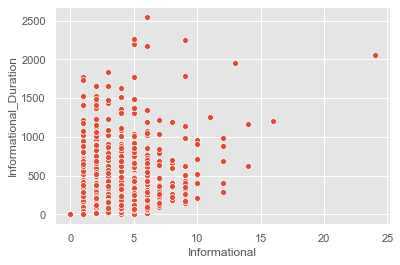

In [47]:
sns.scatterplot(x="Informational", y="Informational_Duration", data=df)

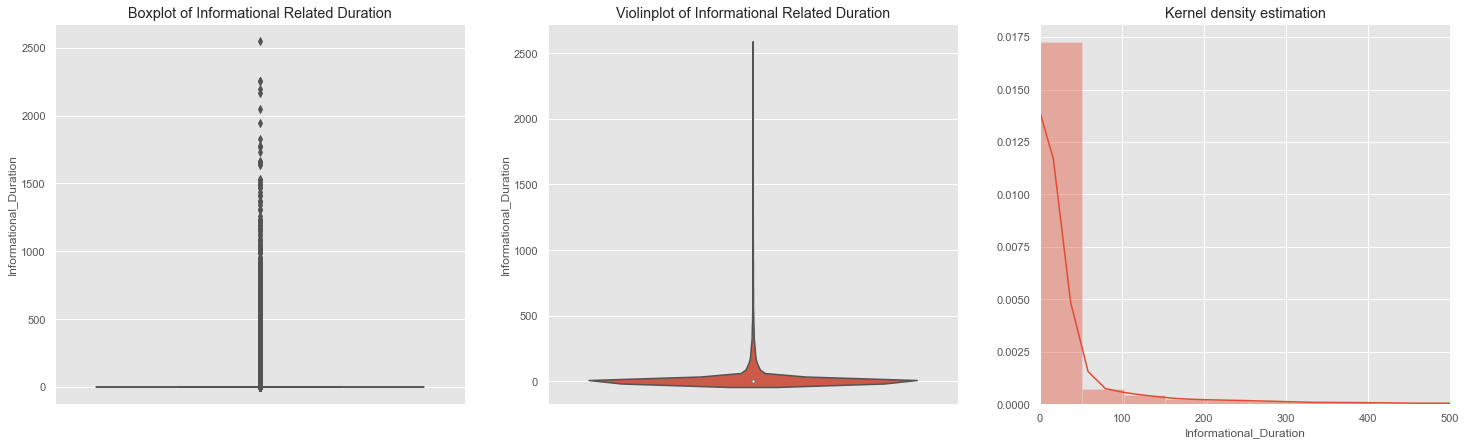

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))
                
plt.subplot(1,3,1)
ax1 = sns.boxplot(y="Informational_Duration", data=df)
plt.title('Boxplot of Informational Related Duration')

plt.subplot(1,3,2)
sns.violinplot(y="Informational_Duration", data=df)
plt.title('Violinplot of Informational Related Duration')


plt.subplot(1,3,3)
sns.distplot(df.Informational_Duration)
plt.title('Kernel density estimation')
plt.xlim(0,500)

plt.show()

In [13]:
#describe basic features about the distrubution
df['Informational_Duration'].describe()

count    12245.000000
mean        34.630576
std        141.137281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

One noteable observation, the number of informational pages visited did not correlate with an increase in informational time duration. Meaning, someone who visited 0 informational pages and someone who visited 5 informational pages could likely have the same informational duration.

<h4> 3.1.3 Administrative Related Duration </h4>

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

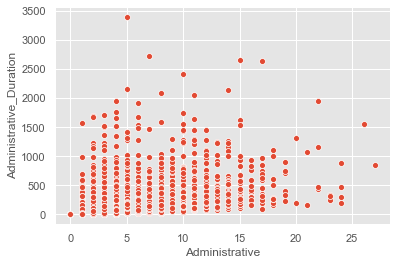

In [49]:
sns.scatterplot(x="Administrative", y="Administrative_Duration", data=df)

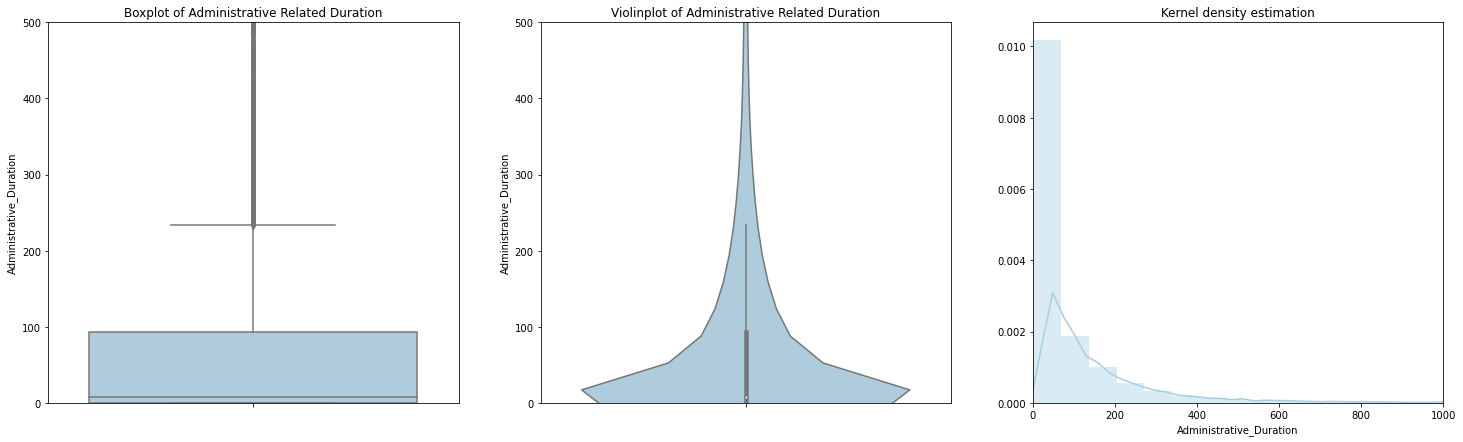

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))

plt.subplot(1,3,1)
ax1 = sns.boxplot(y="Administrative_Duration", data=df)
plt.title('Boxplot of Administrative Related Duration')
plt.ylim(0, 500) #excluding numbers greater than 6,000; mainly about the actual box plot


plt.subplot(1,3,2)
sns.violinplot(y="Administrative_Duration", data=df)
plt.title('Violinplot of Administrative Related Duration')
plt.ylim(0, 500)


plt.subplot(1,3,3)
sns.distplot(df.Administrative_Duration)
plt.title('Kernel density estimation')
plt.xlim(0,1000)

plt.show()

In [15]:
#describe basic features about the distrubution
df['Administrative_Duration'].describe()

count    12245.000000
mean        80.944413
std        176.579347
min          0.000000
25%          0.000000
50%          8.000000
75%         93.600000
max       3398.750000
Name: Administrative_Duration, dtype: float64

<h4> 3.1.4 Month Related Data </h4>

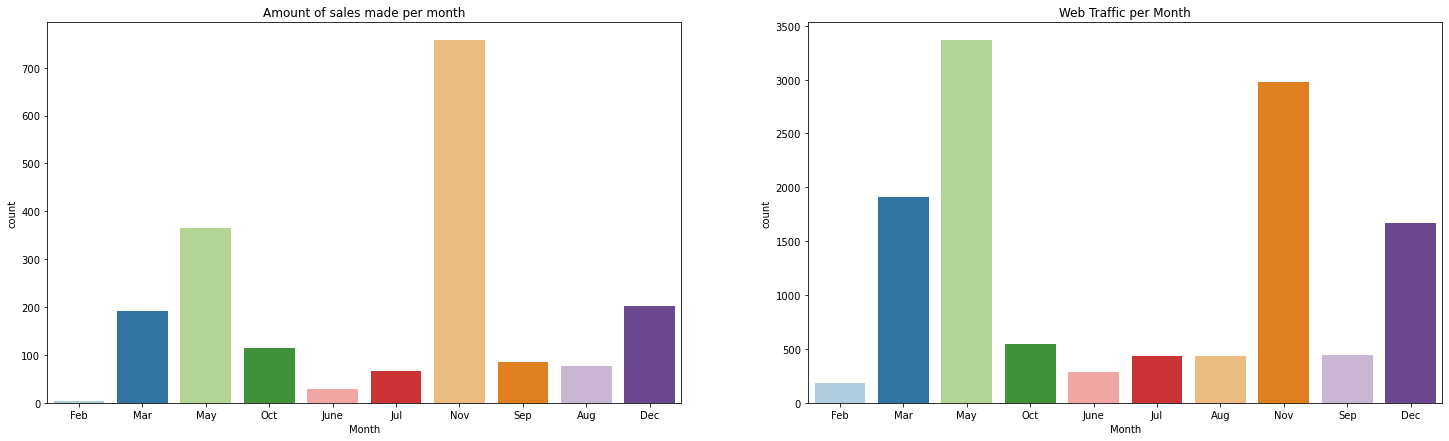

In [16]:
plt.subplots(figsize=(25, 7))
#only examine cases where revenue was made
temp = df
i = 0
for i in temp.index:
    if(df['Revenue'][i] == False):
        temp = temp.drop(i)

#count of number of sales made per month
plt.subplot(1,2,1)
sns.countplot(x='Month', data=temp)
plt.title('Amount of sales made per month')

#count of amount of web traffic per month
plt.subplot(1,2,2)
sns.countplot(x='Month', data=df)
plt.title('Web Traffic per Month')




plt.show()

In [17]:
df['Month'].value_counts() 

May     3364
Nov     2976
Mar     1907
Dec     1665
Oct      549
Sep      448
Aug      433
Jul      432
June     287
Feb      184
Name: Month, dtype: int64

In [18]:
df['Month'].describe()

count     12245
unique       10
top         May
freq       3364
Name: Month, dtype: object

The above categorical count plots only contain the number of sales made per month, and how many web sessions were observed in that respective month. These are not ratios of sales, rather just giving number of sales in that month compared with the total number of observed trials in that month. 

As expected, months with holidays, such as November, have large amounts of sales.

<h4> 3.1.5 Special Day Data </h4>

(0.0, 15.0)

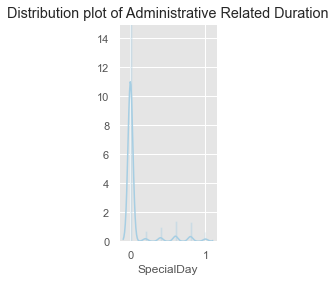

In [52]:
#number of special day ratings
plt.subplot(1,3,1)
sns.distplot(df.SpecialDay)
plt.title('Distribution plot of Administrative Related Duration')
plt.ylim(0,15)

In [20]:
df['SpecialDay'].describe()

count    12245.000000
mean         0.061854
std          0.199540
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [21]:
df['SpecialDay'].value_counts() 

0.0    10994
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Special day is a ratio/rating assigned determined by the proximity to a holiday or special day. Meaning, a high special day would mean an increase in expected webtraffic and purchases. 

<h4> 3.1.6 Page Values Data </h4>

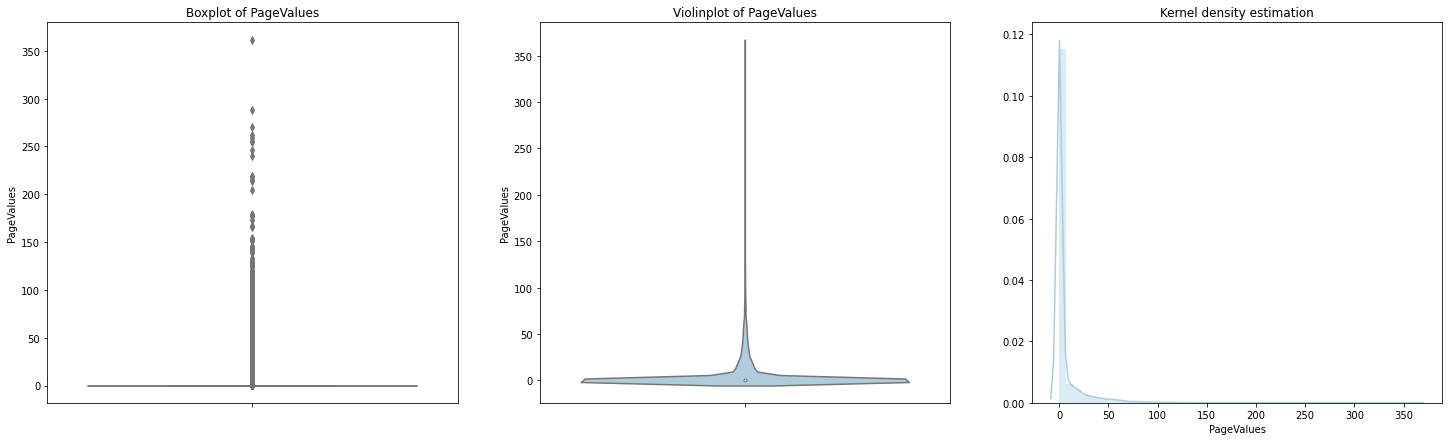

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))

plt.subplot(1,3,1)
ax1 = sns.boxplot(y="PageValues", data=df)
plt.title('Boxplot of PageValues')

plt.subplot(1,3,2)
sns.violinplot(y="PageValues", data=df)
plt.title('Violinplot of PageValues')
plt.ylim


plt.subplot(1,3,3)
sns.distplot(df.PageValues)
plt.title('Kernel density estimation')

plt.show()

<AxesSubplot:xlabel='PageValues'>

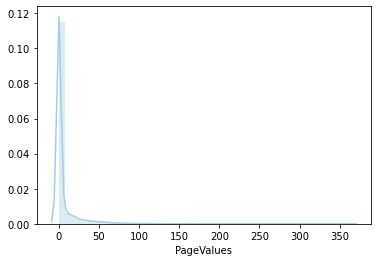

In [23]:
sns.distplot(df.PageValues)

<h4> 3.1.7 Outlier Examination </h4>

When examining the scatterplots/boxplots above, there were a few extreme values, mostly in product durations. However, these were determined not to be eliminated from the dataset because these are feasible values. Meaning, it is possible to have a product duration of 60,000. There were no values that were seen to be impossible/unfeasible (like age = 150). Therefore no outliers were elimanted and the dataset was examined in its entirety.

<h3> 3.2 Data Exploration </h3>

<h4> 3.2.1 Examining Returning versus New Customers </h4>

One factor that could have a large significance in determining customer sales is if a customer is a repeat or new visitor. We might expect returning customers to be frequent buyers/more probable to make a purchase.

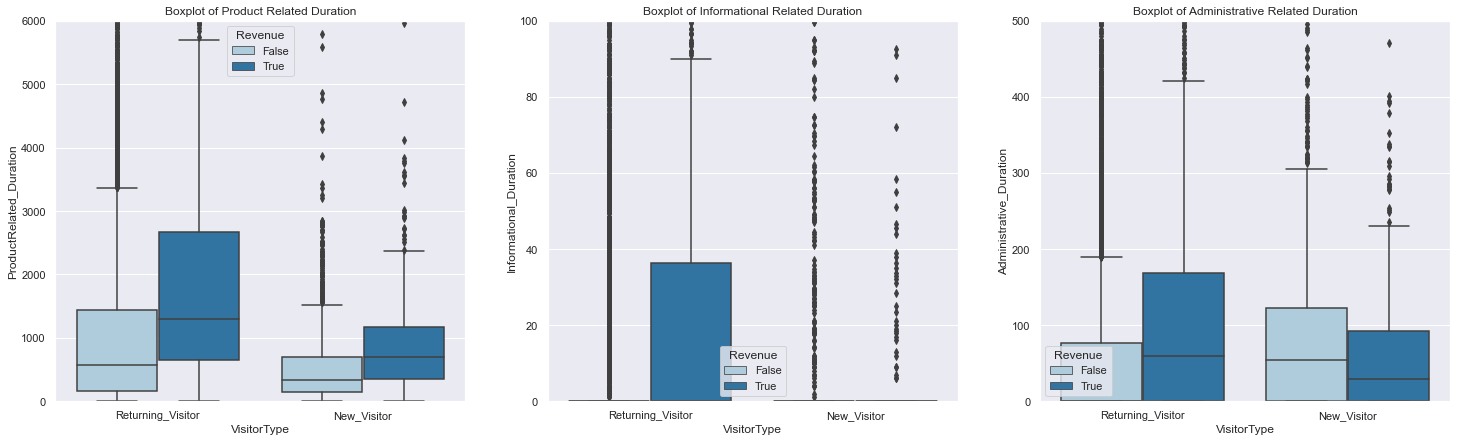

In [25]:
#BOXPLOTS
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))  
sns.set_palette("Paired")

#product related duration boxplot:
plt.subplot(1,3,1)
ax1 = sns.boxplot(x ="VisitorType", y="ProductRelated_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Product Related Duration')
plt.ylim(0, 6000) #excluding numbers greater than 6,000; mainly about the actual box plot


#informational related duration boxplot:
plt.subplot(1,3,2)
ax1 = sns.boxplot(x ="VisitorType", y="Informational_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Informational Related Duration')
plt.ylim(0, 100) #excluding numbers greater than 6,000; mainly about the actual box plot


#adminstartive related duration boxplot:
plt.subplot(1,3,3)
ax1 = sns.boxplot(x ="VisitorType", y="Administrative_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Administrative Related Duration')
plt.ylim(0, 500) #excluding numbers greater than 6,000; mainly about the actual box plot

plt.show()

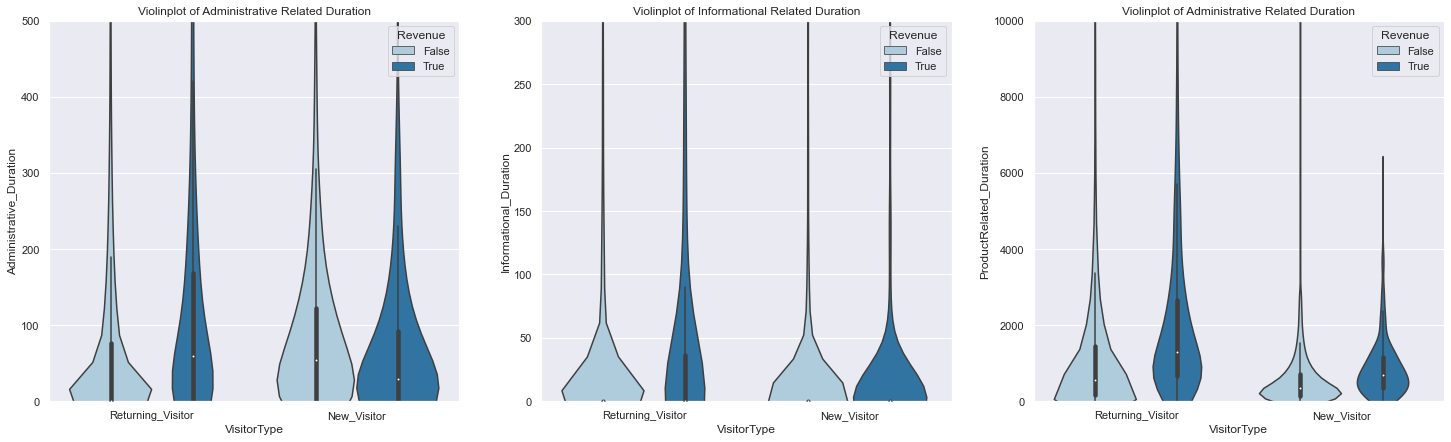

In [26]:
#VIOLION PLOTS
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))  
sns.set_palette("Paired")

#adminstratiave related duration violinplot:
plt.subplot(1,3,1)
sns.violinplot(x ="VisitorType", y="Administrative_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Administrative Related Duration')
plt.ylim(0, 500)

#informational related duration violinplot
plt.subplot(1,3,2)
sns.violinplot(x ="VisitorType", y="Informational_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Informational Related Duration')
plt.ylim(0, 300)

#product related duration violinplot:
plt.subplot(1,3,3)
sns.violinplot(x ="VisitorType", y="ProductRelated_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Administrative Related Duration')
plt.ylim(0, 10000)

plt.show()

For both returning and new customers, website visits that ended in a purchase were more likely to have a higher product related duration. When a sale was made, the quartiles of the boxplot were on average higher, when compared with no sale being made. The middle quartile, or median, was higher in returning customers, given their respective categories. Returning visitors had a larger varying product durations, meaning a wider spread distribution.

A majority of website visitors did not even access an informational webpage, meaning there is a large number of "0" data points. New website visitors accessing an informational page was extremely uncommon (lower to upper quartile boxplot range is all equal to 0) regardless of whether a purchase was made. However, in returning visitors, accessing an informational page made a purchase much more likely. The upper quartile of returning visitors where a purhcase was made, was the only quartile with a postive value.

Similarly to informational duration, there were a sizeable number of users who did not visit an administrative page at all. Odly in new visitors, higher adminstrative time did not correlate with higher sales. In returning visitors, higher administrative time did correlate with higher salse, as one might expect.   

When examining the informational, adminstrative, and product durations boxplots/violinplots, it seems as returning visitors correlate with higher sales numbers. Below is examining if there is a significant difference in returning versus new customers sales, and if being a returning customer is a determining factor in making a purchase.

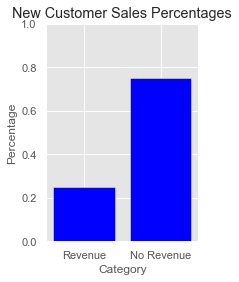

n = 1694


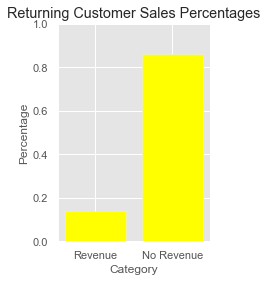

n = 10551


In [27]:
#Perctange of sales for RETURNING customer sales versus NEW customer sales
%matplotlib inline
plt.style.use('ggplot')

plt.subplot(1,2,1)
#variable declarations
ReturnSales = 0
ReturnNoSale = 0
NewSales = 0
NewNoSale = 0
#iterations:
for i in df.index: 
    if(df['VisitorType'][i] == 'Returning_Visitor'):
        #No sale was made
        if(df['Revenue'][i] == False):
            ReturnNoSale = ReturnNoSale + 1
        #Sale was made
        if(df['Revenue'][i] == True):
            ReturnSales = ReturnSales + 1
    else:
        #No sale was made
        if(df['Revenue'][i] == False):
            NewNoSale = NewNoSale + 1
        #Sale was made
        if(df['Revenue'][i] == True):
            NewSales = NewSales + 1
            
#display graph for New Customer:
x = ['Revenue', 'No Revenue']
y = [(NewSales/ (NewSales + NewNoSale)), (NewNoSale/ (NewSales + NewNoSale))]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='blue')
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("New Customer Sales Percentages")

plt.xticks(x_pos, x)
axes = plt.gca()
axes.set_ylim(0, 1)

plt.show()
total = NewSales + NewNoSale
print('n =' , total)

#display graph for Returning Customer:
x = ['Revenue', 'No Revenue']
y = [(ReturnSales/ (ReturnNoSale + ReturnSales)), (ReturnNoSale/ (ReturnNoSale + ReturnSales))]
x_pos = [i for i, _ in enumerate(x)]

plt.subplot(1,2,2)
plt.bar(x_pos, y, color='Yellow')
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Returning Customer Sales Percentages")

plt.xticks(x_pos, x)
axes = plt.gca()
axes.set_ylim(0, 1)

plt.show()
total = ReturnNoSale + ReturnSales
print('n =' , total)

#source for formatting: https://benalexkeen.com/bar-charts-in-matplotlib/#:~:text=Bar%20charts%20are%20used%20to,are%20then%20provided%20by%20plt.
#source: https://stackoverflow.com/questions/3777861/setting-y-axis-limit-in-matplotlib 


Based on the boxplots and violinplots, one might think there is a significant difference between returning versus new customers sales. However, when examining the above plot, returning/new customer type is not an accurate predictor or causation for a sale to be made. Contrary to my assumption, the sales ratio for new customers was higher than the sales ratio of new customers. Initially aT-test would was presumed to be neccessary to determine a stastically significant difference, however we can forego this test because the two ratios are similar enough. 

<h4> 3.2.2 Examining Month and Special Day Sales Ratios </h4>

<BarContainer object of 10 artists>

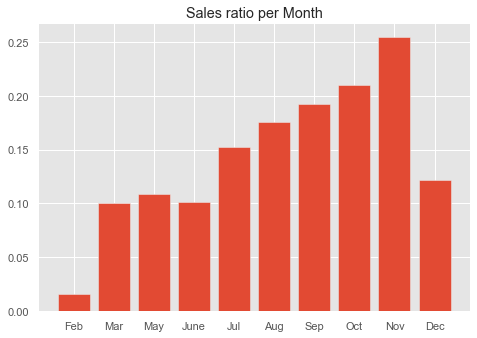

In [28]:
#Month perctanage of sales made
# x = sales made / total sales
febRatio = df.Month[df.Revenue==True][df.Month == 'Feb'].count() /  (df.Month[df.Revenue==False][df.Month == 'Feb'].count() + df.Month[df.Revenue==True][df.Month == 'Feb'].count() )
MarRatio = df.Month[df.Revenue==True][df.Month == 'Mar'].count() /  (df.Month[df.Revenue==False][df.Month == 'Mar'].count() + df.Month[df.Revenue==True][df.Month == 'Mar'].count() )
MayRatio = df.Month[df.Revenue==True][df.Month == 'May'].count() /  (df.Month[df.Revenue==False][df.Month == 'May'].count() + df.Month[df.Revenue==True][df.Month == 'May'].count() )
JuneRatio = df.Month[df.Revenue==True][df.Month == 'June'].count() / (df.Month[df.Revenue==False][df.Month == 'June'].count() + df.Month[df.Revenue==True][df.Month == 'June'].count())
JulRatio = df.Month[df.Revenue==True][df.Month == 'Jul'].count() /  (df.Month[df.Revenue==False][df.Month == 'Jul'].count() + df.Month[df.Revenue==True][df.Month == 'Jul'].count())
AugRatio = df.Month[df.Revenue==True][df.Month == 'Aug'].count() / (df.Month[df.Revenue==False][df.Month == 'Aug'].count() +  df.Month[df.Revenue==True][df.Month == 'Aug'].count())
SepRatio = df.Month[df.Revenue==True][df.Month == 'Sep'].count() / (df.Month[df.Revenue==False][df.Month == 'Sep'].count() + df.Month[df.Revenue==True][df.Month == 'Sep'].count())
OctRatio = df.Month[df.Revenue==True][df.Month == 'Oct'].count() / (df.Month[df.Revenue==False][df.Month == 'Oct'].count() + df.Month[df.Revenue==True][df.Month == 'Oct'].count())
NovRatio = df.Month[df.Revenue==True][df.Month == 'Nov'].count() / (df.Month[df.Revenue==False][df.Month == 'Nov'].count() + df.Month[df.Revenue==True][df.Month == 'Nov'].count() )
DecRatio = df.Month[df.Revenue==True][df.Month == 'Dec'].count() / (df.Month[df.Revenue==False][df.Month == 'Dec'].count() + df.Month[df.Revenue==True][df.Month == 'Dec'].count())

#plot values 
import matplotlib.pyplot as plt 
  
# x axis values 
x = ['Feb','Mar','May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
# corresponding y axis values 
y = [febRatio,MarRatio,MayRatio,JuneRatio,JulRatio,AugRatio,SepRatio,OctRatio,NovRatio,DecRatio] 
  
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Sales ratio per Month')
# plotting the points  
ax.bar(x,y)
#source formatting: tutorials point.com

This bargraph shows the website's sales ratio per month. Meaning in higher purchase months, such as around the holidays, a customer was more likely to make a purchase on the website. These ratios make sense because sales probability peaks in months where purchasing is expected to be higher, for example Black Friday customers in Novembers. Overall, the month of the year has an affect on a customers purchase.

Next we will examine the special day data, and see if it has a similar affect.

<BarContainer object of 4 artists>

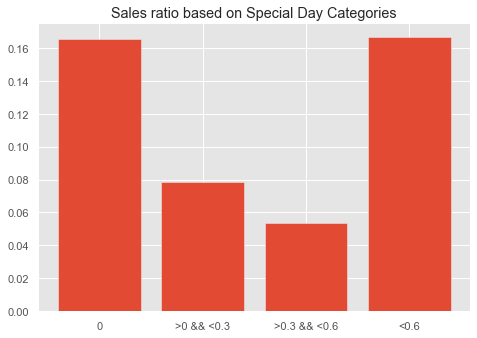

In [30]:
#categorizing special days by rating

#category:0
n1 = df.SpecialDay[df.SpecialDay == 0].count()
cat1 = df.SpecialDay[df.SpecialDay == 0][df.Revenue == True].count() /df.SpecialDay[df.SpecialDay == 0].count()

#category: <0.3
n2 = (df.SpecialDay[df.SpecialDay < 0.3].count()) - n1
cat2 = (df.SpecialDay[df.SpecialDay < 0.3][df.Revenue == True].count() -  df.SpecialDay[df.SpecialDay == 0][df.Revenue == True].count()) / (df.SpecialDay[df.SpecialDay < 0.3].count() - n1)

#category <0.6 && >0.3
cat3 = (df.SpecialDay[df.SpecialDay < 0.6][df.Revenue == True].count() -  df.SpecialDay[df.SpecialDay < 0.3][df.Revenue == True].count())  / (df.SpecialDay[df.SpecialDay < 0.6].count() - df.SpecialDay[df.SpecialDay < 0.3].count())


#category >0.6
cat4 = (df.SpecialDay[df.SpecialDay > 0.6][df.Revenue == True].count() -  df.SpecialDay[df.SpecialDay < 0.6][df.Revenue == True].count())  / (df.SpecialDay[df.SpecialDay > 0.6].count() - df.SpecialDay[df.SpecialDay < 0.6].count())
x = ['0', '>0 && <0.3', '>0.3 && <0.6' , '<0.6']
y = [cat1, cat2, cat3, cat4]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Sales ratio based on Special Day Categories')
# plotting the points  
ax.bar(x,y)
#source formatting: tutorials point.com




Suprisingly, the sales ratios did not increase with the special day category increase. This is strange because months affected the sales ratio as expected and linearlly. Perhaps the way the dataset labeled "special day" was not exactly accurate/best represenatitive. However, based on this data, special day is not a determining factor or causation in a purchase decesion.

<h4> 3.2.3 Examining Page Values and Sales Ratio </h4>

Looking at the data for adminstrative, informational, and product related pages made me interested in the pages that lead to the purchase. This statstic is represented as "page values."

In [54]:
df['PageValues'].describe()

count    12245.000000
mean         5.803858
std         18.075511
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

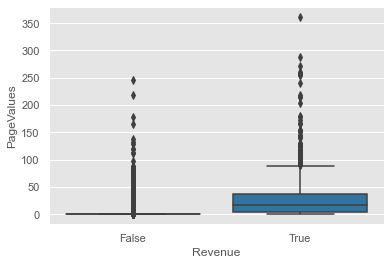

In [58]:
ax = sns.boxplot(x="Revenue",y=df["PageValues"], data=df)

As expected, the page values were much on average higher when a sale was made. The upper and lower quartiles of the boxplot were all 0 when no sales were made. When sales were made, the distribution looks much different, the lower and upper quartiles are all non-zero values. 

However, this boxplot did not describe the distribution exactly as anticipated. There are many outliers and high visited page values when revenue is false. High page value might be more of an indicator of the most popular pages and common pages for purchase. Meaning, page values correlate with purchase, they are not as much of a causation as predicted, rather they might be an indicator of well perfroming web pages.

<h3> 4 Additional Analysis </h3>

<h4> 4.1 Correlation Matrix </h4>

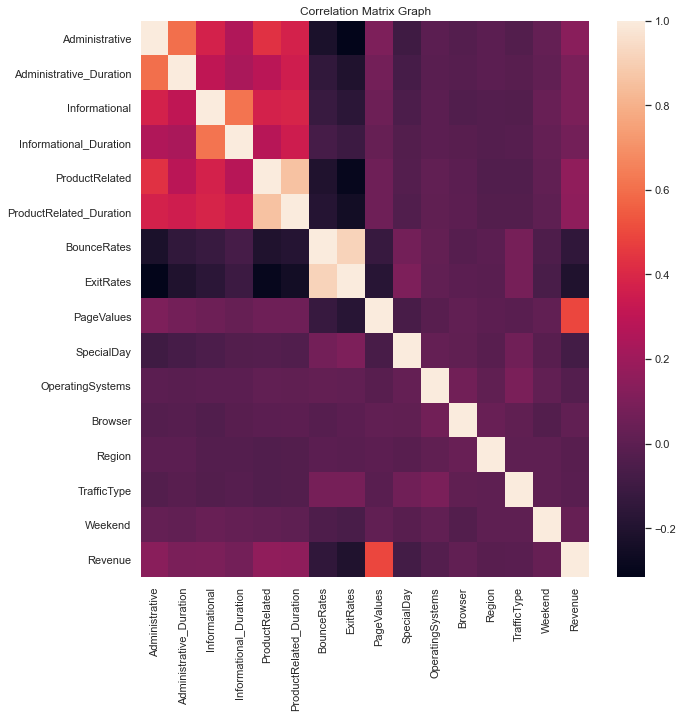

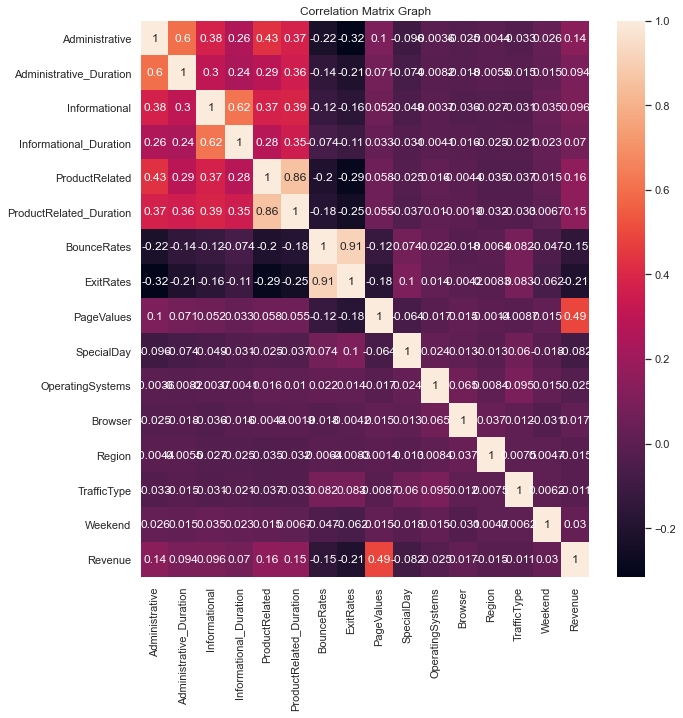

In [24]:
from matplotlib import cm 
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr())

f.tight_layout()
plt.title('Correlation Matrix Graph')
plt.show()


f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

f.tight_layout()
plt.title('Correlation Matrix Graph')
plt.show()

Most of the columuns of the correlation matrix have low correlation. The adminstrative duration and adminstrative pages had a high correlation because they are dependent on each other (this is the same for informational and product related pages). This correlation exists for many pages on the website.

The only other notable correlation is revenue and page values. Page values is the page that lead to the purchase, so it makes sense why it has a high correlation with revenue. Overall, page values are a significant factor for a company to look at when determining revenue/a purchase being made. The company might want to recommend these pages often to a user and make that page easily accessable to the user.